# Stack and unStack

In [1]:
import pandas as pd

In [2]:
summer = pd.read_csv("summer.csv")

In [3]:
summer.head()

Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver

In [5]:
medals_by_country = summer.groupby(["Country","Medal"]).Medal.count()

In [6]:
medals_by_country

Country  Medal 
AFG      Bronze       2
AHO      Silver       1
ALG      Bronze       8
         Gold         5
         Silver       2
ANZ      Bronze       5
         Gold        20
         Silver       4
ARG      Bronze      91
         Gold        69
         Silver      99
ARM      Bronze       8
         Gold         1
         Silver       2
AUS      Bronze     472
         Gold       312
         Silver     405
AUT      Bronze      44
         Gold        21
         Silver      81
AZE      Bronze      15
         Gold         6
         Silver       5
BAH      Bronze       5
         Gold        13
         Silver       9
BAR      Bronze       1
BDI      Gold         1
BEL      Bronze     152
         Gold        91
                   ... 
UKR      Bronze      90
         Gold        41
         Silver      42
URS      Bronze     584
         Gold       838
         Silver     627
URU      Bronze      30
         Gold        44
         Silver       2
USA      Bronze    1098


In [10]:
medals_by_country.loc["USA"]

Medal
Bronze    1098
Gold      2235
Silver    1252
Name: Medal, dtype: int64

In [8]:
medals_by_country.shape

(347,)

In [11]:
medals_by_country.unstack()

Medal    Bronze    Gold  Silver
Country                        
AFG         2.0     NaN     NaN
AHO         NaN     NaN     1.0
ALG         8.0     5.0     2.0
ANZ         5.0    20.0     4.0
ARG        91.0    69.0    99.0
ARM         8.0     1.0     2.0
AUS       472.0   312.0   405.0
AUT        44.0    21.0    81.0
AZE        15.0     6.0     5.0
BAH         5.0    13.0     9.0
BAR         1.0     NaN     NaN
BDI         NaN     1.0     NaN
BEL       152.0    91.0   168.0
BER         1.0     NaN     NaN
BLR        59.0    17.0    37.0
BOH         6.0     NaN     1.0
BOT         NaN     NaN     1.0
BRA       185.0    73.0   173.0
BRN         1.0     NaN     NaN
BUL       137.0    53.0   143.0
BWI         5.0     NaN     NaN
CAN       262.0   155.0   232.0
CHI        21.0     3.0     9.0
CHN       221.0   290.0   296.0
CIV         NaN     NaN     1.0
CMR         2.0    20.0     1.0
COL        11.0     2.0     6.0
CRC         2.0     1.0     1.0
CRO        34.0    46.0    34.0
CUB       116.0   165.0   129.0
...         ...     ...     ...
SUD         NaN     NaN     1.0
SUI       138.0    75.0   167.0
SUR         1.0     1.0     NaN
SVK        12.0    10.0    12.0
SWE       328.0   349.0   367.0
SYR         1.0     1.0     1.0
TAN         NaN     NaN     2.0
TCH       105.0    80.0   144.0
TGA         NaN     NaN     1.0
THA        12.0     7.0     6.0
TJK         2.0     NaN     1.0
TOG         1.0     NaN     NaN
TPE        14.0     3.0    27.0
TRI        11.0     1.0     8.0
TTO         5.0     1.0     4.0
TUN         4.0     4.0     2.0
TUR        23.0    38.0    25.0
UAE         NaN     1.0     NaN
UGA         2.0     2.0     3.0
UKR        90.0    41.0    42.0
URS       584.0   838.0   627.0
URU        30.0    44.0     2.0
USA      1098.0  2235.0  1252.0
UZB        10.0     5.0     5.0
VEN         8.0     2.0     2.0
VIE         NaN     NaN     2.0
YUG       118.0   143.0   174.0
ZAM         1.0     NaN     1.0
ZIM         1.0    18.0     4.0
ZZX        10.0    23.0    15.0

[147 rows x 3 columns]

In [12]:
medals_by_country = medals_by_country.unstack(level = -1, fill_value=0)

In [13]:
medals_by_country.head()

Medal    Bronze  Gold  Silver
Country                      
AFG           2     0       0
AHO           0     0       1
ALG           8     5       2
ANZ           5    20       4
ARG          91    69      99

In [15]:
medals_by_country.shape

(147, 3)

In [16]:
medals_by_country = medals_by_country[["Gold","Silver","Bronze"]]

In [17]:
medals_by_country.sort_values(by=["Gold","Silver","Bronze"], ascending=[False,False,False], inplace =True)

In [19]:
medals_by_country.head(10)

Medal    Gold  Silver  Bronze
Country                      
USA      2235    1252    1098
URS       838     627     584
GBR       546     621     553
ITA       476     416     404
GER       452     378     475
HUN       412     316     351
FRA       408     491     497
SWE       349     367     328
GDR       329     271     225
AUS       312     405     472

In [20]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

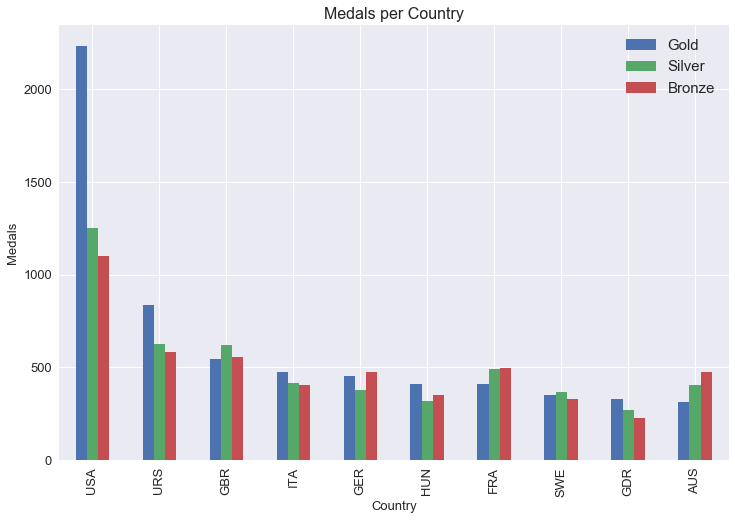

In [24]:
medals_by_country.head(10).plot(kind="bar",figsize = (12,8), fontsize = 13)
plt.xlabel("Country", fontsize=13)
plt.ylabel("Medals", fontsize=13)
plt.title("Medals per Country", fontsize=16)
plt.legend(fontsize = 15)
plt.show()

In [22]:
medals_by_country.stack().unstack()

Medal    Gold  Silver  Bronze
Country                      
USA      2235    1252    1098
URS       838     627     584
GBR       546     621     553
ITA       476     416     404
GER       452     378     475
HUN       412     316     351
FRA       408     491     497
SWE       349     367     328
GDR       329     271     225
AUS       312     405     472
CHN       290     296     221
RUS       239     238     291
NED       233     279     339
JPN       213     272     303
NOR       209     200     145
CUB       165     129     116
KOR       158     204     167
ROU       157     195     288
CAN       155     232     262
DEN       150     197     160
YUG       143     174     118
FRG       143     167     180
IND       128      18      38
FIN       124     120     212
POL       106     174     231
ESP        98     227     117
EUN        92      65      66
BEL        91     168     152
NZL        85      30      75
TCH        80     144     105
...       ...     ...     ...
IOP         0       1       2
KGZ         0       1       2
TJK         0       1       2
ZAM         0       1       1
AHO         0       1       0
BOT         0       1       0
CIV         0       1       0
CYP         0       1       0
GAB         0       1       0
GUA         0       1       0
ISV         0       1       0
SEN         0       1       0
SUD         0       1       0
TGA         0       1       0
BWI         0       0       5
QAT         0       0       4
SGP         0       0       4
AFG         0       0       2
KUW         0       0       2
BAR         0       0       1
BER         0       0       1
BRN         0       0       1
DJI         0       0       1
ERI         0       0       1
GUY         0       0       1
IRQ         0       0       1
MKD         0       0       1
MRI         0       0       1
NIG         0       0       1
TOG         0       0       1

[147 rows x 3 columns]